In [102]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
df=pd.read_csv("/kaggle/input/bank-term-deposit-predictions/test.csv")

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
df["age"].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


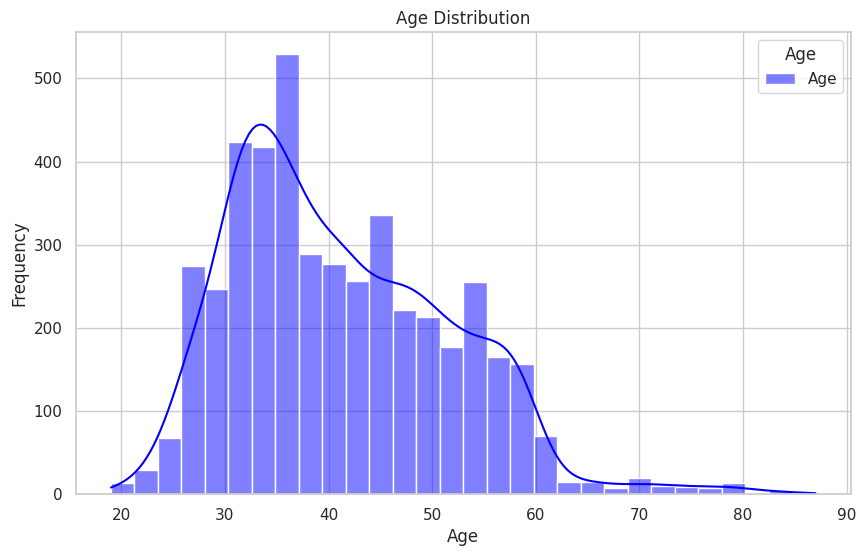

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df["age"],kde=True,bins=30,label="Age",color='blue')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(loc="best",title="Age")
plt.title("Age Distribution")
plt.show()

In [26]:
df["job"].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

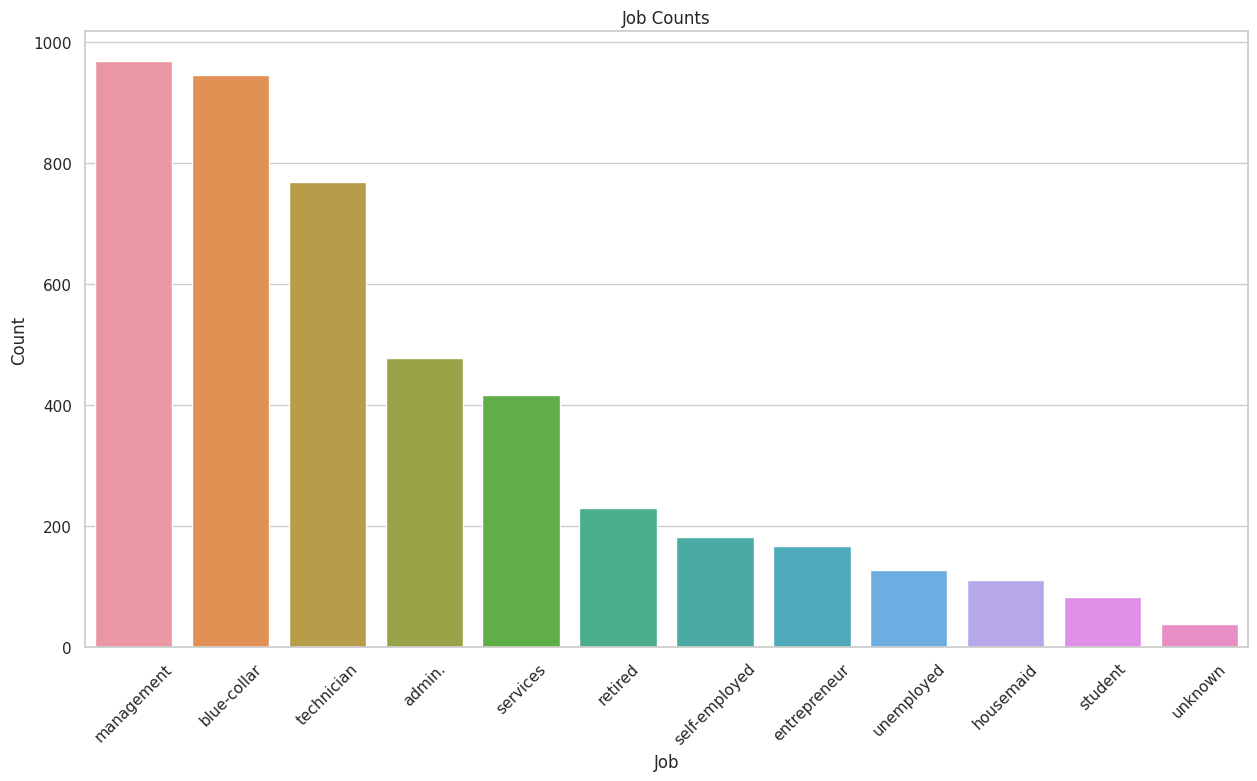

In [48]:
job_count = df["job"].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=job_count.index, y=job_count.values)
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Job Counts')
plt.show()

In [52]:
df.job.replace("unknown","others",inplace=True)

In [55]:
df["job"]

0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4516         services
4517    self-employed
4518       technician
4519      blue-collar
4520     entrepreneur
Name: job, Length: 4521, dtype: object

In [59]:
matrial=df["marital"].value_counts()
matrial


marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

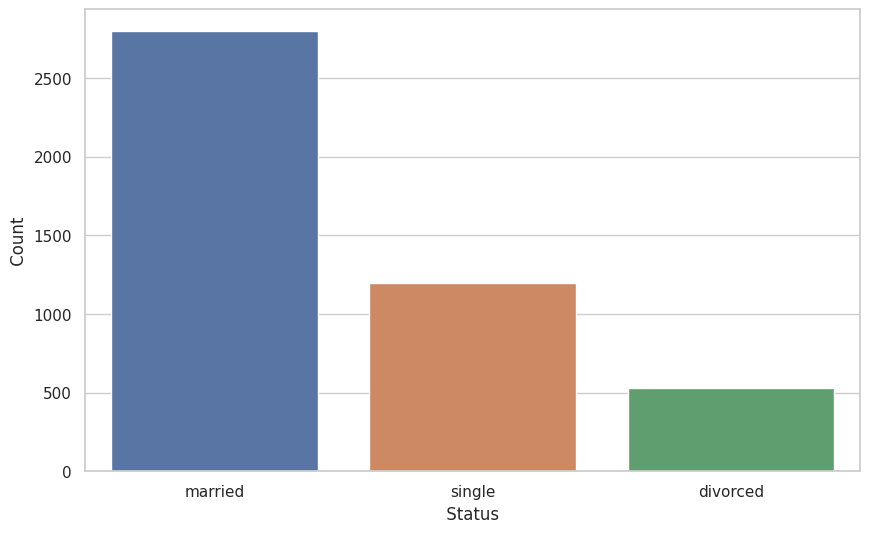

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x=matrial.index,y=matrial.values)
plt.xlabel(" Status ")
plt.ylabel(" Count ")
plt.show()

In [64]:
edu=df["education"].value_counts()
edu

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

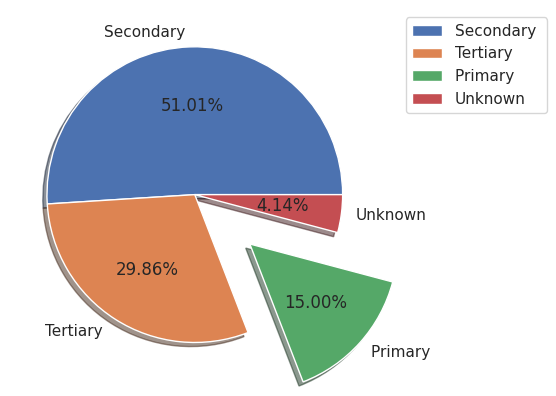

In [83]:
edu_l=edu.to_list()
plt.Figure(figsize=(30,20))
labels=["Secondary ","Tertiary ","Primary ","Unknown"]
plt.pie(edu_l,explode=[0,0,0.5,0],shadow=True,autopct="%0.2f%%",labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [84]:
df["balance"].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


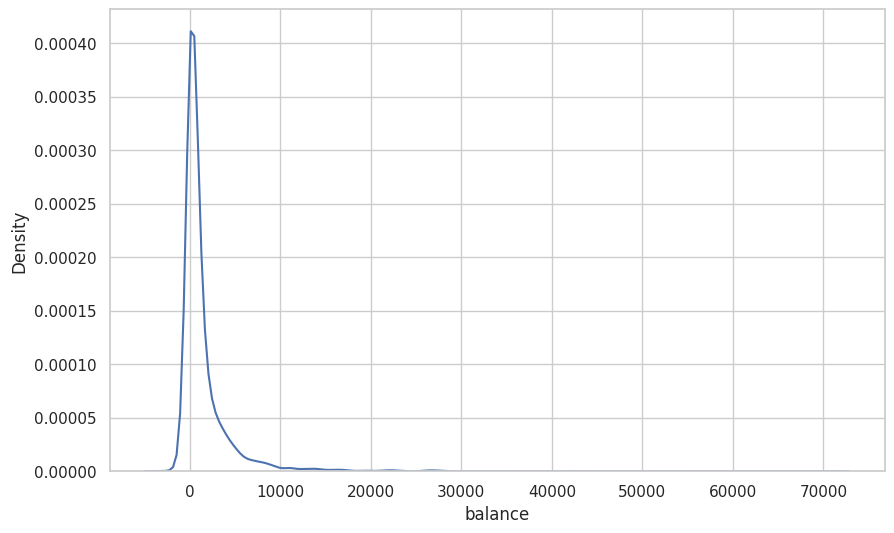

In [148]:
plt.figure(figsize=(10,6)) 
sns.kdeplot(df["balance"])
plt.show()

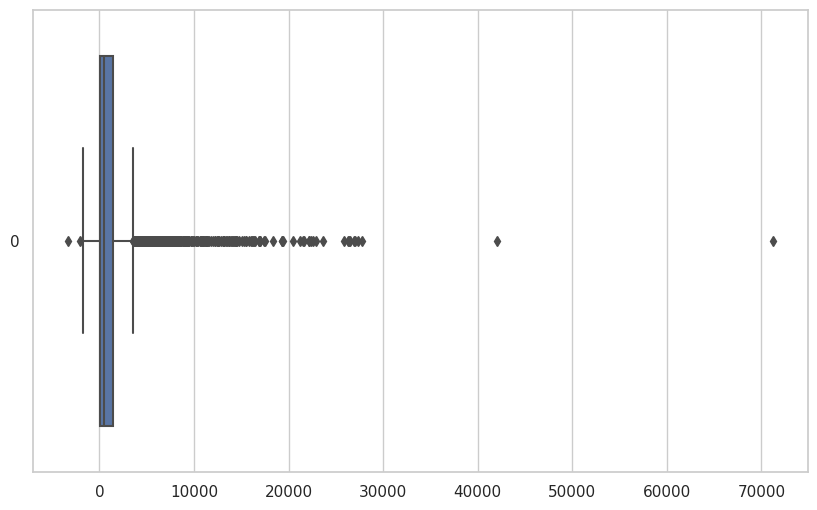

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(df["balance"],orient='h')
plt.show()

In [90]:
housing=df["housing"].value_counts()
housing

housing
yes    2559
no     1962
Name: count, dtype: int64

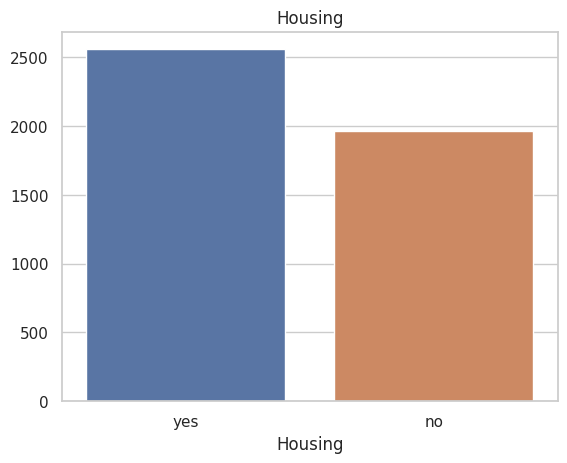

In [96]:
plt.title("Housing")
sns.barplot(x=housing.index,y=housing.values)
plt.xlabel("Housing")
plt.show()

In [98]:
loan=df["loan"].value_counts()
loan

loan
no     3830
yes     691
Name: count, dtype: int64

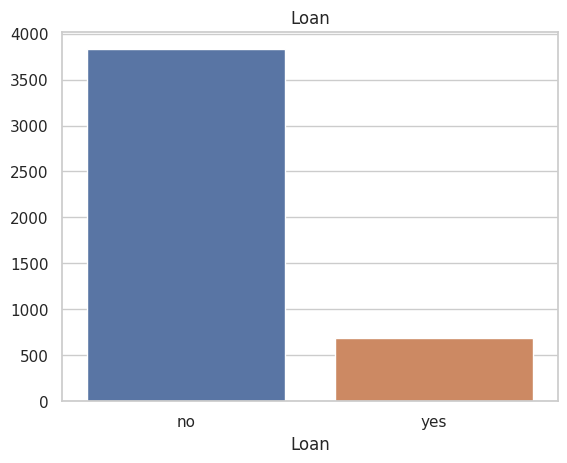

In [99]:
plt.title("Loan")
sns.barplot(x=loan.index,y=loan.values)
plt.xlabel("Loan")
plt.show()

In [101]:
contact=df["contact"].value_counts()
contact

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

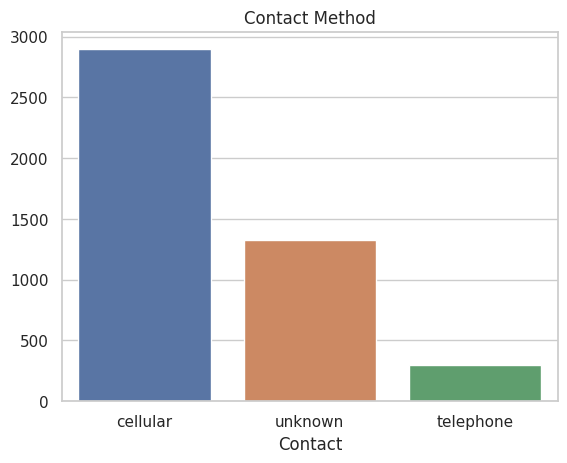

In [106]:
plt.title("Contact Method")
sns.barplot(x=contact.index,y=contact.values)
plt.xlabel("Contact")
plt.show()

In [107]:
df["day"].describe()


count    4521.000000
mean       15.915284
std         8.247667
min         1.000000
25%         9.000000
50%        16.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


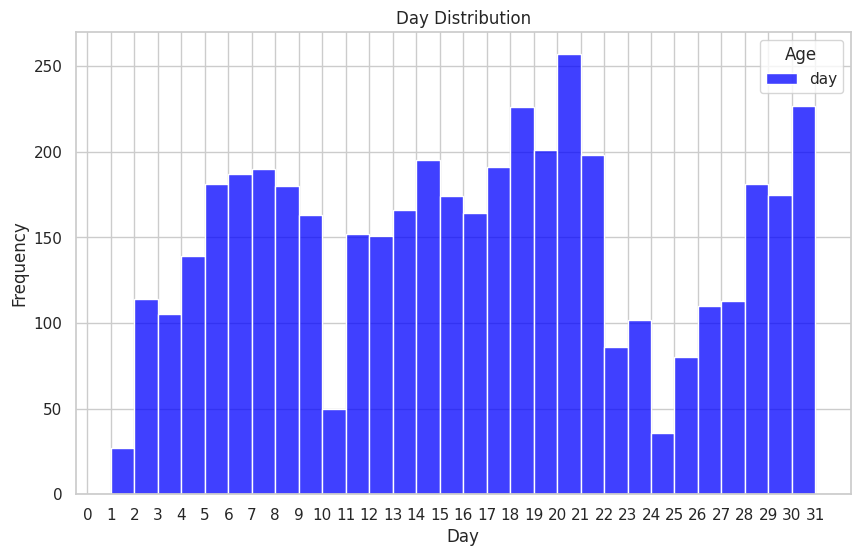

In [112]:
plt.figure(figsize=(10,6))
sns.histplot(df["day"],kde=False,bins=30,label="day",color='blue')
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.legend(loc="best",title="Age")
plt.xticks(np.arange(0,32))
plt.title("Day Distribution")
plt.show()

In [113]:
month=df["month"].value_counts()
month

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

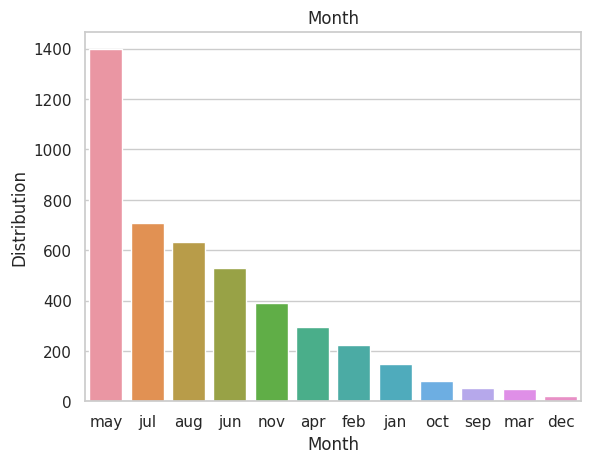

In [114]:
plt.title("Month")
sns.barplot(x=month.index,y=month.values)
plt.xlabel("Month")
plt.ylabel("Distribution")
plt.show()

In [117]:
Duration=df["duration"].describe()
Duration

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


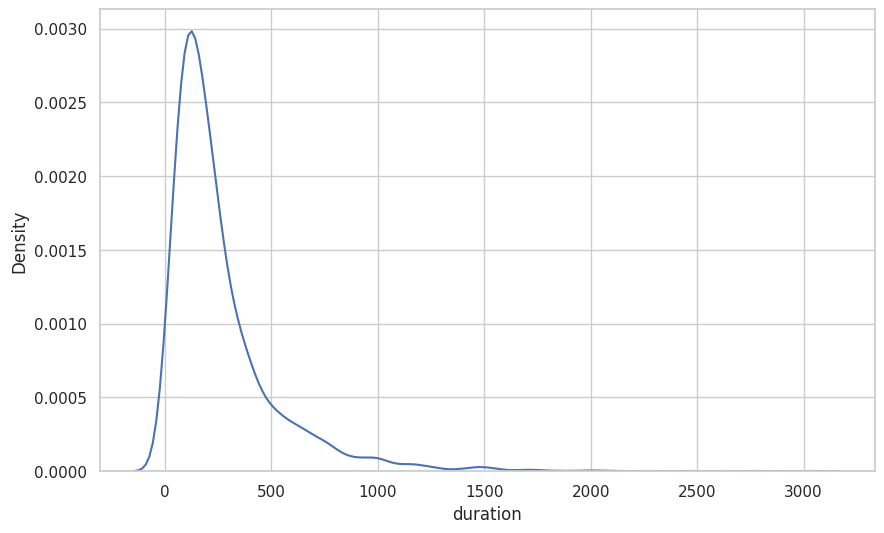

In [149]:
plt.figure(figsize=(10,6)) 
sns.kdeplot(df["duration"])
plt.show()

In [119]:
df["campaign"].describe()

count    4521.000000
mean        2.793630
std         3.109807
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: campaign, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


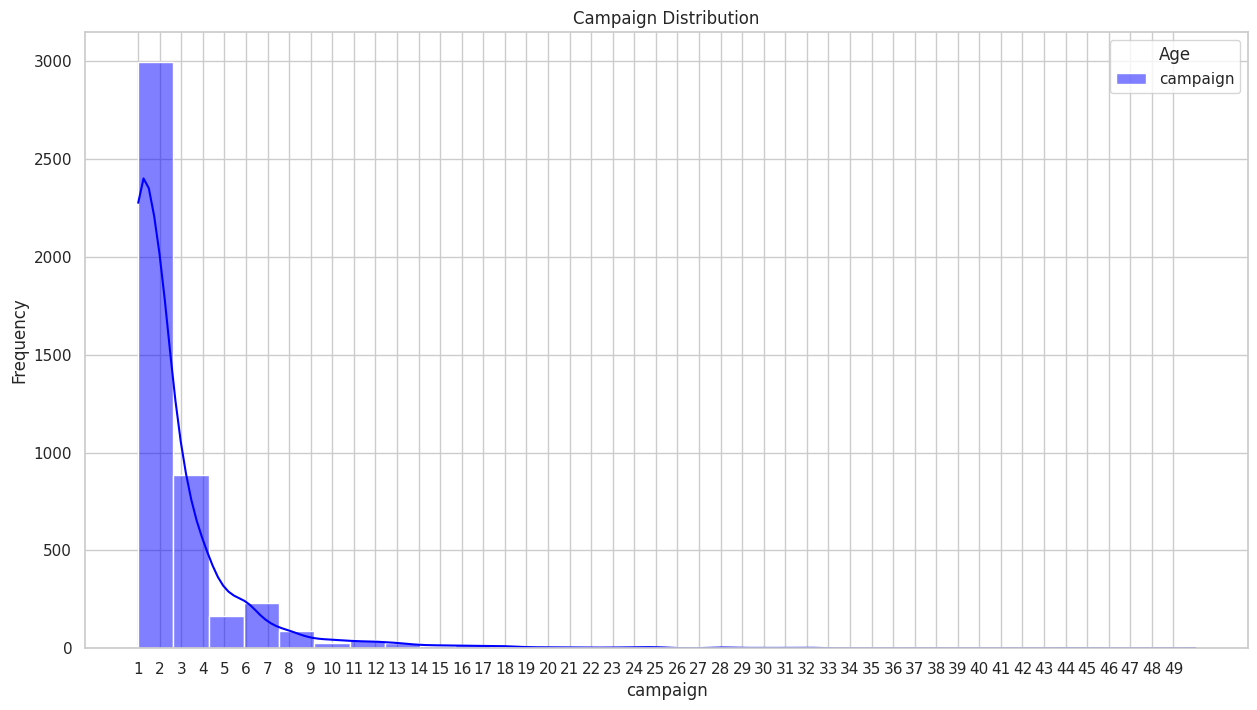

In [122]:
plt.figure(figsize=(15,8))
sns.histplot(df["campaign"],kde=True,bins=30,label="campaign",color='blue')
plt.xlabel("campaign")
plt.ylabel("Frequency")
plt.legend(loc="best",title="Age")
plt.xticks(np.arange(1,50))
plt.title("Campaign Distribution")
plt.show()

In [124]:
df["pdays"].describe()

count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

In [138]:
df["previous"].describe()

count    4521.000000
mean        0.542579
std         1.693562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: previous, dtype: float64

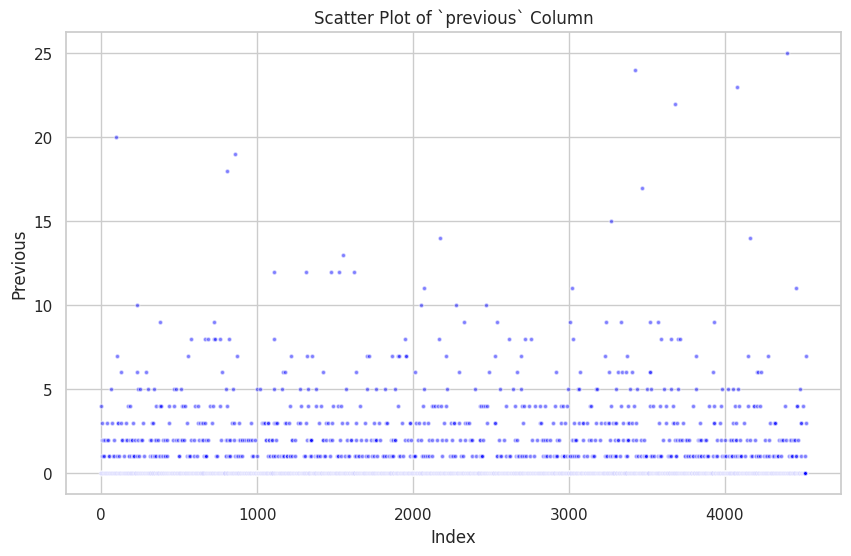

In [139]:
plt.figure(figsize=(10, 6))  
plt.scatter(df.index, df["previous"], alpha=0.5, c='blue', edgecolors='w', s=10)
plt.title('Scatter Plot of `previous` Column')
plt.xlabel('Index')
plt.ylabel('Previous')
plt.grid(True)
plt.show()


In [142]:
pc=df["poutcome"].value_counts()
pc

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

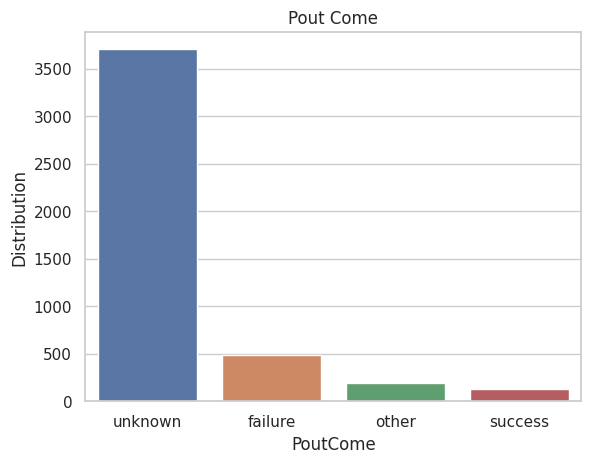

In [143]:
plt.title("Pout Come")
sns.barplot(x=pc.index,y=pc.values)
plt.xlabel("PoutCome")
plt.ylabel("Distribution")
plt.show()

In [146]:
y=df['y'].value_counts()
y

y
no     4000
yes     521
Name: count, dtype: int64

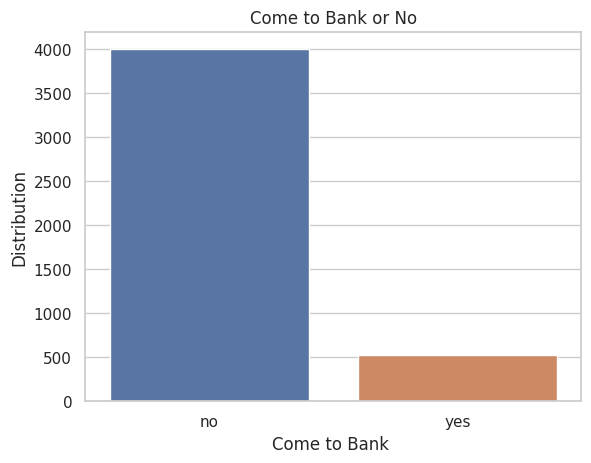

In [147]:
plt.title("Come to Bank or No")
sns.barplot(x=y.index,y=y.values)
plt.xlabel("Come to Bank ")
plt.ylabel("Distribution")
plt.show()

In [156]:
df.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

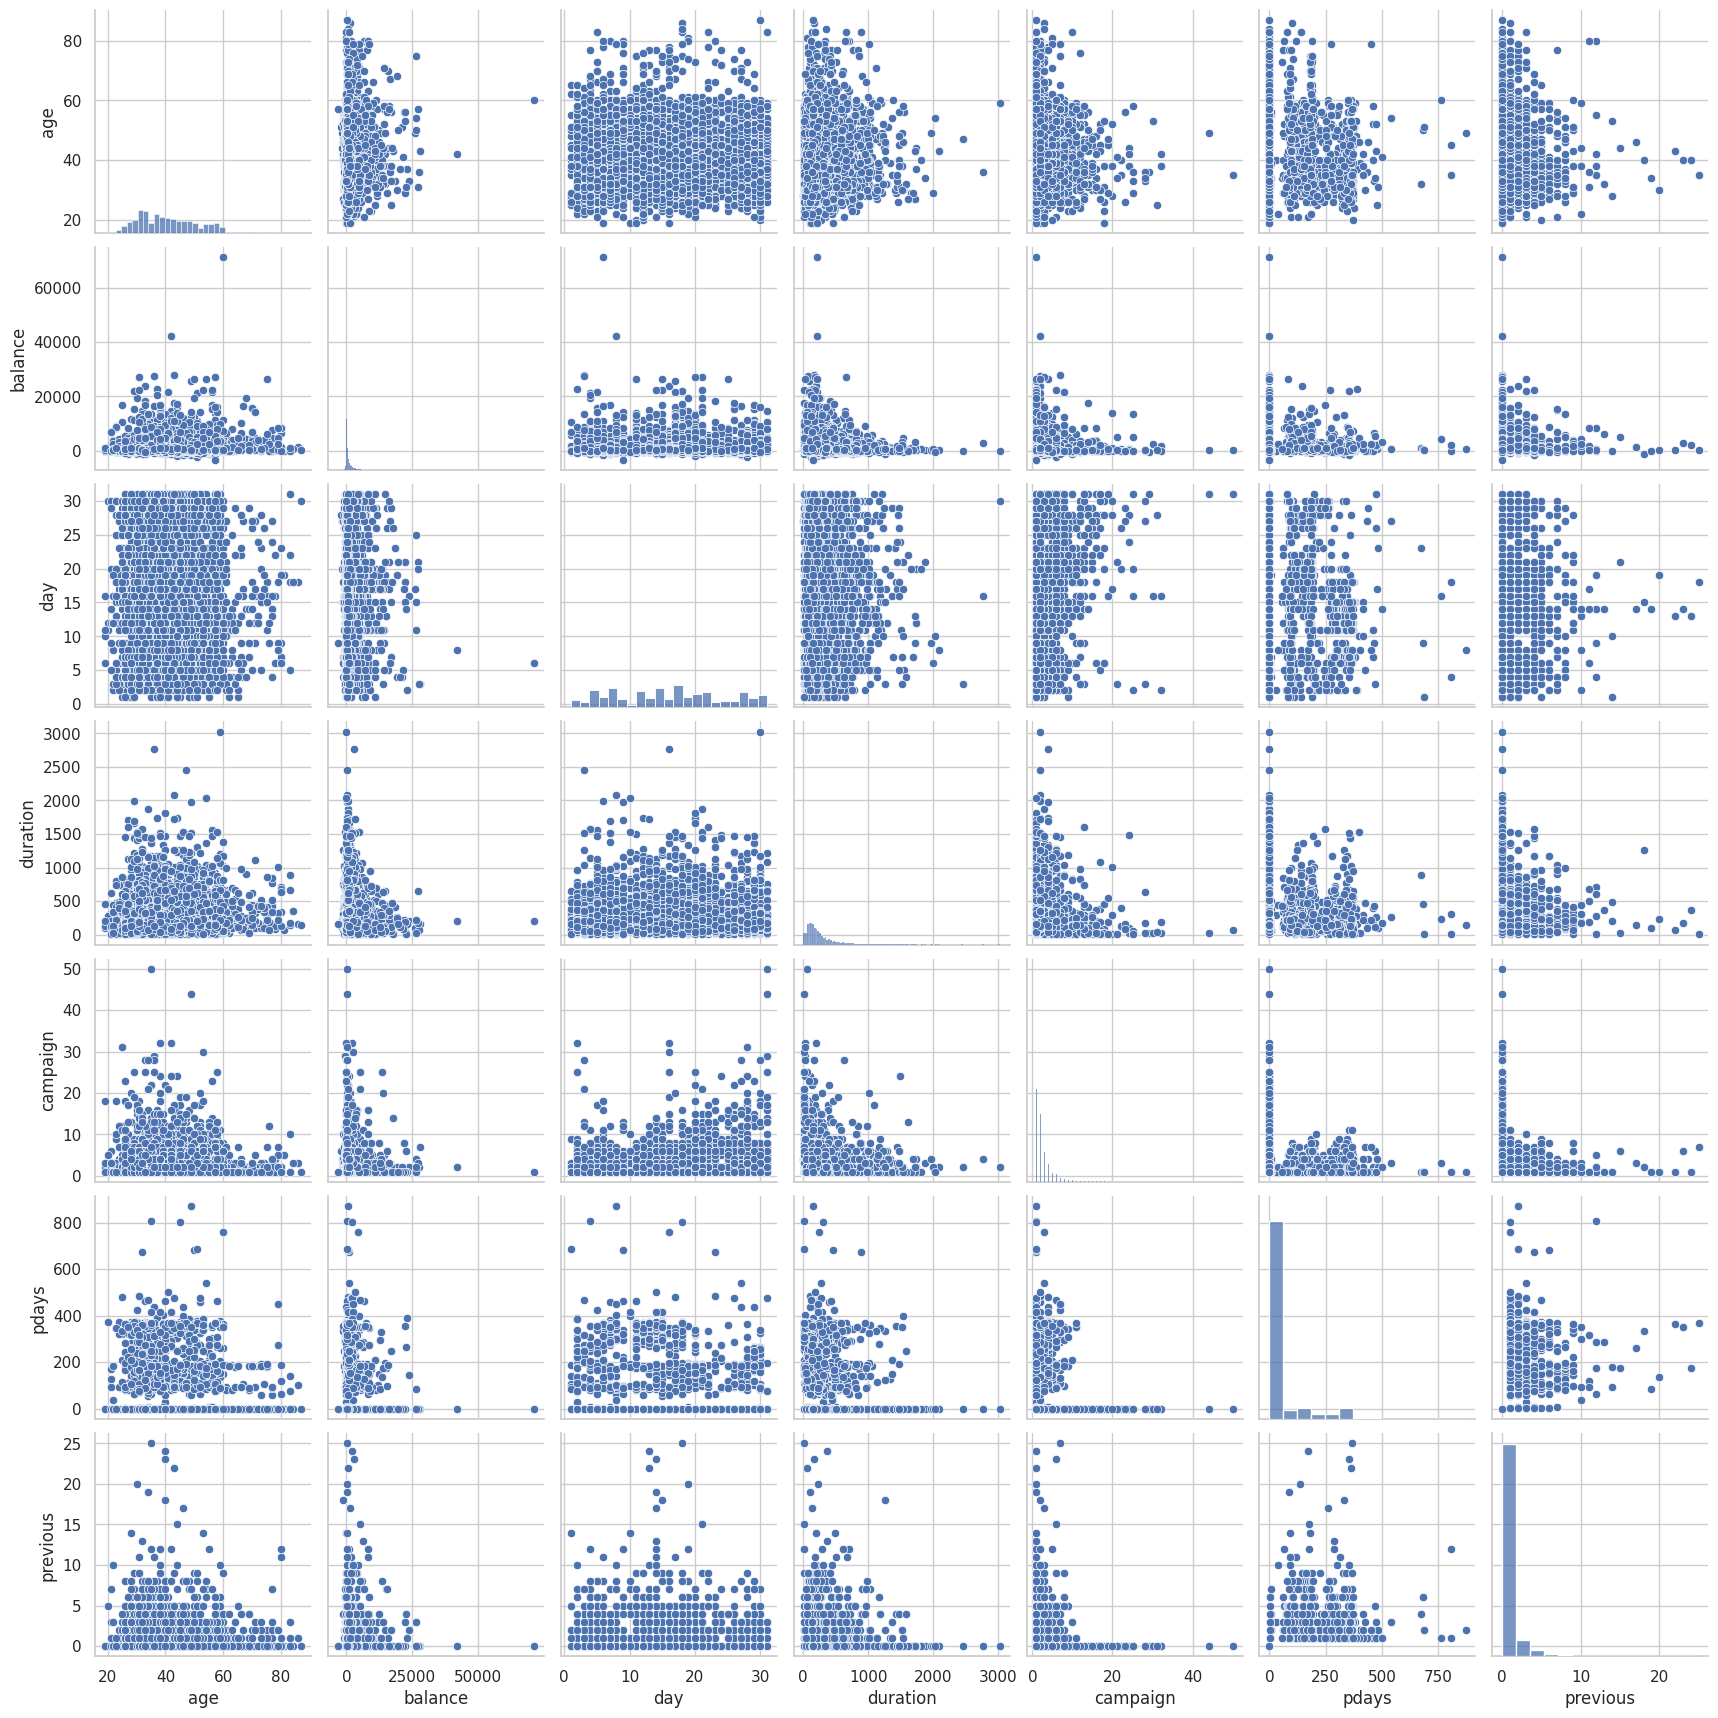

In [151]:
sns.pairplot(df)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

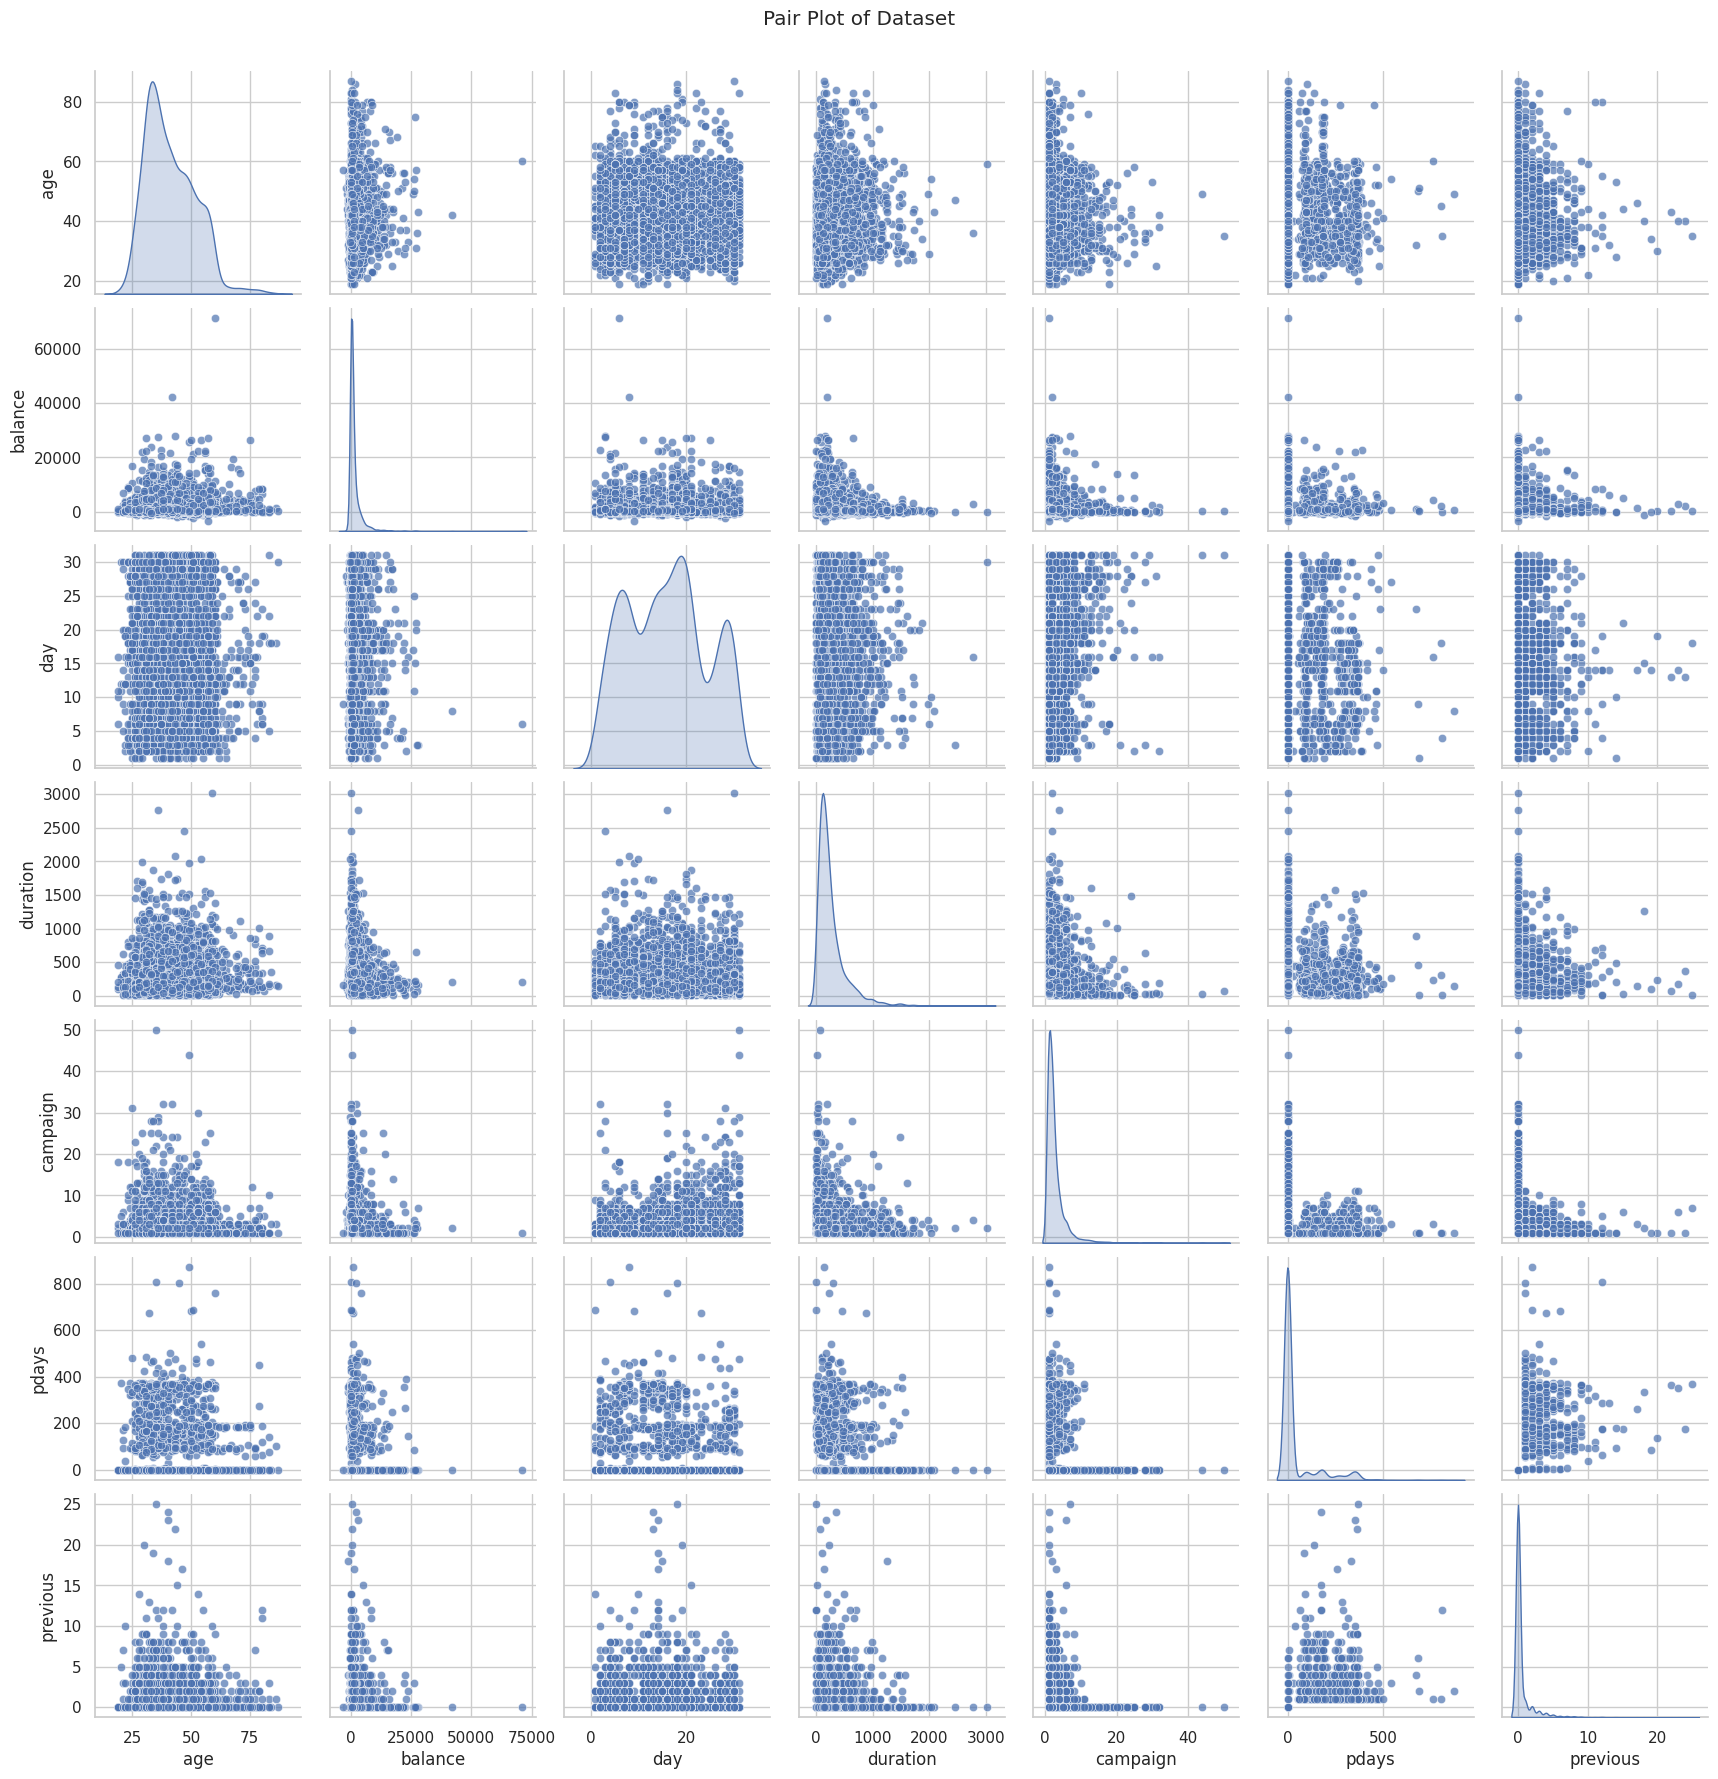

In [152]:
sns.pairplot(df, diag_kind='kde', markers='o', plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot of Dataset', y=1.02)
plt.show()